In [56]:
import numpy as np
import os
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.transform import downscale_local_mean

In [ ]:
def center_crop(img, new_width=None, new_height=None):        

    width = img.shape[1]
    height = img.shape[0]

    if new_width is None:
        new_width = min(width, height)

    if new_height is None:
        new_height = min(width, height)

    left = int(np.ceil((width - new_width) / 2))
    right = width - int(np.floor((width - new_width) / 2))

    top = int(np.ceil((height - new_height) / 2))
    bottom = height - int(np.floor((height - new_height) / 2))

    if len(img.shape) == 2:
        center_cropped_img = img[top:bottom, left:right,]
    else:
        center_cropped_img = img[top:bottom, left:right, ...]

    return center_cropped_img

In [22]:
im = io.imread(r'C:\Users\dhart\Desktop\DIV2K_train_HR\DIV2K_train_HR\0072.png')
new_im = center_crop(im,1024,1024)

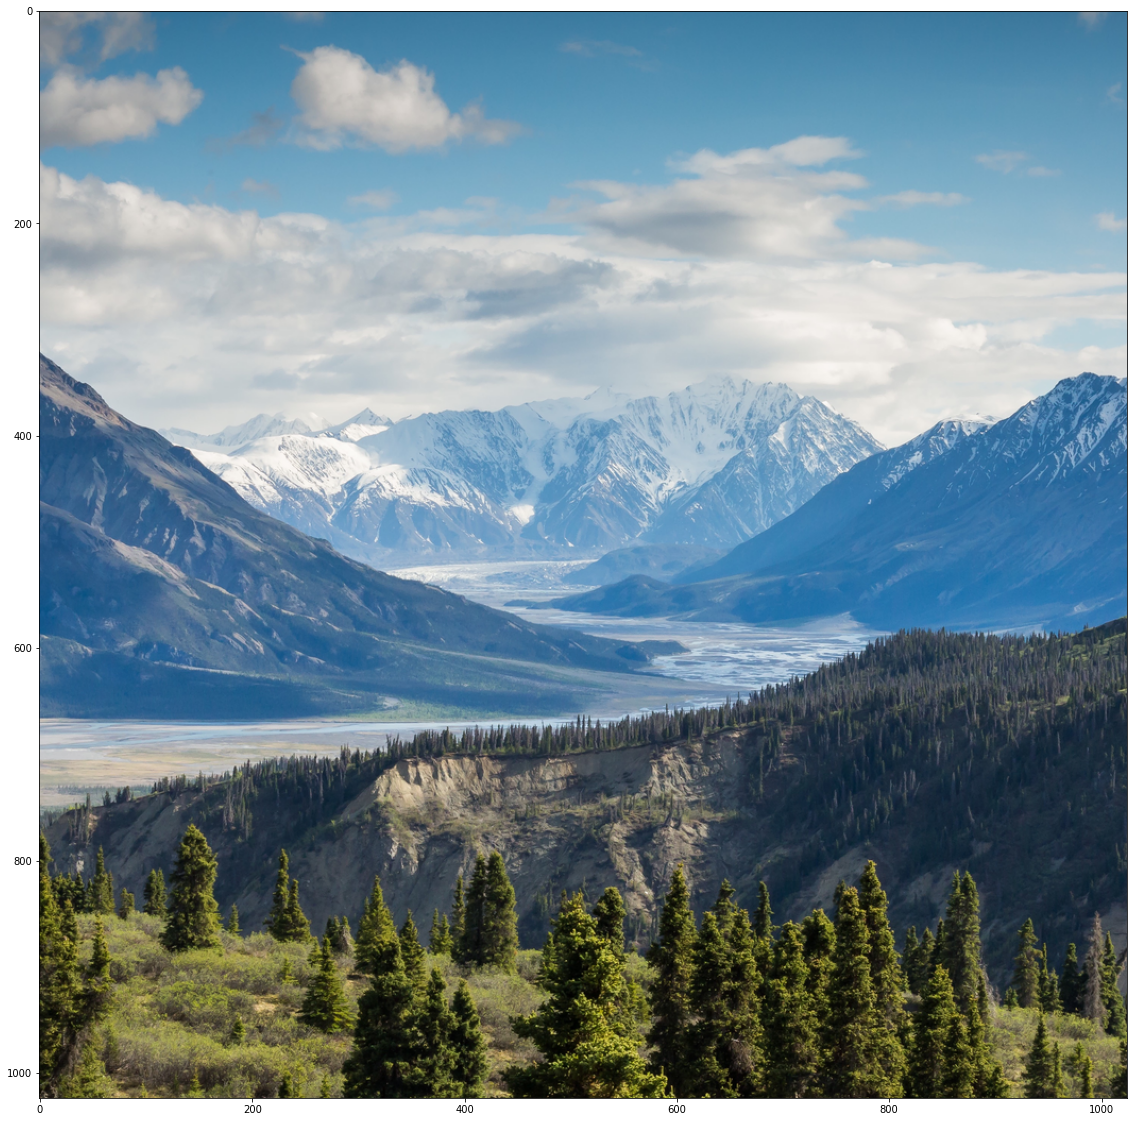

In [23]:
plt.figure(figsize = (20,20))
plt.imshow(new_im)

In [41]:
image_downscaled1 = downscale_local_mean(new_im[:,:,0], (4, 4))
image_downscaled2 = downscale_local_mean(new_im[:,:,1], (4, 4))
image_downscaled3 = downscale_local_mean(new_im[:,:,2], (4, 4))
image_downscaled = np.stack((image_downscaled1,image_downscaled2,image_downscaled3), axis=2)

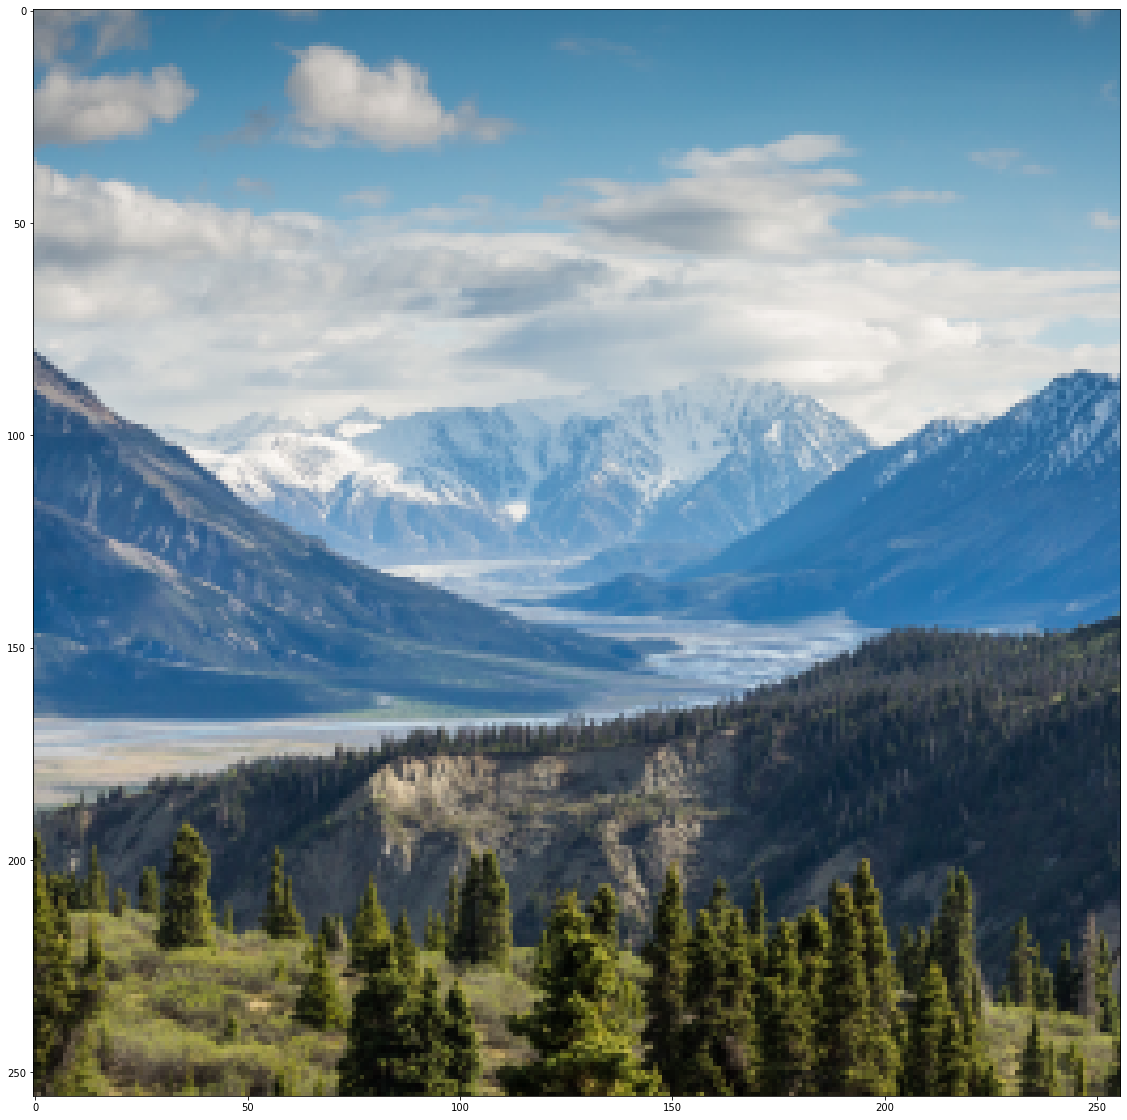

In [54]:
plt.figure(figsize = (20,20))
plt.imshow(image_downscaled.astype(im.dtype))

In [52]:
def image_downsample(img,scale_fac):
    x = downscale_local_mean(img[:,:,0], (scale_fac,scale_fac))
    y = downscale_local_mean(img[:,:,1], (scale_fac,scale_fac))
    z = downscale_local_mean(img[:,:,2], (scale_fac,scale_fac))  
    
    return np.stack((x,y,z),axis = 2).astype(img.dtype)
    

In [87]:
def create_dataLR(folder,save_path,size,sc):
    for filenames in os.listdir(folder):
        img_ = io.imread(os.path.join(folder,filenames))
        if img_.shape[0] < size or img_.shape[1] < size:
            continue
        img_ = center_crop(img_,size,size)
        img_ = image_downsample(img_, sc)
        io.imsave(f'{save_path}\\{filenames}',img_)
    print('Images have been saved to {}'.format(save_path))

In [89]:
def create_dataHR(folder,save_path,size):
    for filenames in os.listdir(folder):
        img_ = io.imread(os.path.join(folder,filenames))
        if img_.shape[0] < size or img_.shape[1] < size:
            continue
        img_ = center_crop(img_,size,size)
        io.imsave(f'{save_path}\\{filenames}',img_)
    print('Images have been saved to {}'.format(save_path))

In [92]:
ff = r'C:\Users\dhart\Desktop\SR\DIV2K_valid_HR'
ss = r'C:\Users\dhart\Desktop\SR\div2k\valid\LR'

create_dataLR(ff,ss,1024,4)


Images have been saved to C:\Users\dhart\Desktop\SR\div2k\valid\LR


In [93]:
ff = r'C:\Users\dhart\Desktop\SR\DIV2K_valid_HR'
ss = r'C:\Users\dhart\Desktop\SR\div2k\valid\HR'
create_dataHR(ff,ss,1024)

Images have been saved to C:\Users\dhart\Desktop\SR\div2k\valid\HR
